<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Predicting "Greenness" Of Content

_Authors: Joseph Nelson (DC), Kiefer Katovich (SF)_

---


This dataset comes from [stumbleupon](https://www.stumbleupon.com/), a web page recommender and was made available [here](https://www.kaggle.com/c/stumbleupon/download/train.tsv)

A description of the columns is below

FieldName|Type|Description
---------|----|-----------
url|string|Url of the webpage to be classified
urlid|integer| StumbleUpon's unique identifier for each url
boilerplate|json|Boilerplate text
alchemy_category|string|Alchemy category (per the publicly available Alchemy API found at www.alchemyapi.com)
alchemy_category_score|double|Alchemy category score (per the publicly available Alchemy API found at www.alchemyapi.com)
avglinksize| double|Average number of words in each link
commonLinkRatio_1|double|# of links sharing at least 1 word with 1 other links / # of links
commonLinkRatio_2|double|# of links sharing at least 1 word with 2 other links / # of links
commonLinkRatio_3|double|# of links sharing at least 1 word with 3 other links / # of links
commonLinkRatio_4|double|# of links sharing at least 1 word with 4 other links / # of links
compression_ratio|double|Compression achieved on this page via gzip (measure of redundancy)
embed_ratio|double|Count of number of <embed> usage
frameBased|integer (0 or 1)|A page is frame-based (1) if it has no body markup but have a frameset markup
frameTagRatio|double|Ratio of iframe markups over total number of markups
hasDomainLink|integer (0 or 1)|True (1) if it contains an <a> with an url with domain
html_ratio|double|Ratio of tags vs text in the page
image_ratio|double|Ratio of <img> tags vs text in the page
is_news|integer (0 or 1) | True (1) if StumbleUpon's news classifier determines that this webpage is news
lengthyLinkDomain| integer (0 or 1)|True (1) if at least 3 <a> 's text contains more than 30 alphanumeric characters
linkwordscore|double|Percentage of words on the page that are in hyperlink's text
news_front_page| integer (0 or 1)|True (1) if StumbleUpon's news classifier determines that this webpage is front-page news
non_markup_alphanum_characters|integer| Page's text's number of alphanumeric characters
numberOfLinks|integer Number of <a>|markups
numwords_in_url| double|Number of words in url
parametrizedLinkRatio|double|A link is parametrized if it's url contains parameters or has an attached onClick event
spelling_errors_ratio|double|Ratio of words not found in wiki (considered to be a spelling mistake)
label|integer (0 or 1)|User-determined label. Either evergreen (1) or non-evergreen (0); available for train.tsv only

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import json
%matplotlib inline

# set max printout options for pandas:
pd.options.display.max_columns = 50
pd.options.display.max_colwidth = 300

### 1. Load the data
- Note it is a `.tsv` file and has a tab separator instead of comma.
- Clean the `is_news` column.
- Make two new columns, `title` and `body`, from the `boilerplate` column.

> **Note:** The `boilerplate` column is in json dictionary format. You can use the `json.loads()` function from the `json` module to convert this into a python dictionary.

In [2]:
evergreen_tsv = '../data/evergreen_sites.tsv'

In [3]:
# Load tsv file using pd.read_csv
green = pd.read_csv(evergreen_tsv, sep='\t')
green.head()

,url,urlid,boilerplate,alchemy_category,alchemy_category_score,avglinksize,commonlinkratio_1,commonlinkratio_2,commonlinkratio_3,commonlinkratio_4,compression_ratio,embed_ratio,framebased,frameTagRatio,hasDomainLink,html_ratio,image_ratio,is_news,lengthyLinkDomain,linkwordscore,news_front_page,non_markup_alphanum_characters,numberOfLinks,numwords_in_url,parametrizedLinkRatio,spelling_errors_ratio,label
0,http://www.bloomberg.com/news/2010-12-23/ibm-predicts-holographic-calls-air-breathing-batteries-by-2015.html,4042,"{""title"":""IBM Sees Holographic Calls Air Breathing Batteries ibm sees holographic calls, air-breathing batteries"",""body"":""A sign stands outside the International Business Machines Corp IBM Almaden Research Center campus in San Jose California Photographer Tony Avelar Bloomberg Buildings stand at...",business,0.789131,2.055556,0.676471,0.205882,0.047059,0.023529,0.443783,0.0,0,0.090774,0,0.245831,0.003883,1,1,24,0,5424,170,8,0.152941,0.079130,0
1,http://www.popsci.com/technology/article/2012-07/electronic-futuristic-starting-gun-eliminates-advantages-races,8471,"{""title"":""The Fully Electronic Futuristic Starting Gun That Eliminates Advantages in Races the fully electronic, futuristic starting gun that eliminates advantages in races the fully electronic, futuristic starting gun that eliminates advantages in races"",""body"":""And that can be carried on a pla...",recreation,0.574147,3.677966,0.508021,0.288770,0.213904,0.144385,0.468649,0.0,0,0.098707,0,0.203490,0.088652,1,1,40,0,4973,187,9,0.181818,0.125448,1
2,http://www.menshealth.com/health/flu-fighting-fruits?cm_mmc=Facebook-_-MensHealth-_-Content-Health-_-FightFluWithFruit,1164,"{""title"":""Fruits that Fight the Flu fruits that fight the flu | cold & flu | men's health"",""body"":""Apples The most popular source of antioxidants in our diet one apple has an antioxidant effect equivalent to 1 500 mg of vitamin C Apples are loaded with protective flavonoids which may prevent hea...",health,0.996526,2.382883,0.562016,0.321705,0.120155,0.042636,0.525448,0.0,0,0.072448,0,0.226402,0.120536,1,1,55,0,2240,258,11,0.166667,0.057613,1
3,http://www.dumblittleman.com/2007/12/10-foolproof-tips-for-better-sleep.html,6684,"{""title"":""10 Foolproof Tips for Better Sleep "",""body"":""There was a period in my life when I had a lot of problems with sleep It took me very long to fall asleep I was easily awaken and I simply wasn t getting enough of rest at night I didn t want to take medication and this led me to learn sever...",health,0.801248,1.543103,0.400000,0.100000,0.016667,0.000000,0.480725,0.0,0,0.095861,0,0.265656,0.035343,1,0,24,0,2737,120,5,0.041667,0.100858,1
4,http://bleacherreport.com/articles/1205138-the-50-coolest-jerseys-you-didnt-know-existed?show_full=,9006,"{""title"":""The 50 Coolest Jerseys You Didn t Know Existed coolest jerseys you haven't seen"",""body"":""Jersey sales is a curious business Whether you re buying the stylish top to represent your favorite team player or color you re always missing out on better artwork With No 18 Colts jerseys continu...",sports,0.719157,2.676471,0.500000,0.222222,0.123457,0.043210,0.446143,0.0,0,0.024908,0,0.228887,0.050473,1,1,14,0,12032,162,10,0.098765,0.082569,0


In [4]:
green.columns

Index(['url', 'urlid', 'boilerplate', 'alchemy_category',
       'alchemy_category_score', 'avglinksize', 'commonlinkratio_1',
       'commonlinkratio_2', 'commonlinkratio_3', 'commonlinkratio_4',
       'compression_ratio', 'embed_ratio', 'framebased', 'frameTagRatio',
       'hasDomainLink', 'html_ratio', 'image_ratio', 'is_news',
       'lengthyLinkDomain', 'linkwordscore', 'news_front_page',
       'non_markup_alphanum_characters', 'numberOfLinks', 'numwords_in_url',
       'parametrizedLinkRatio', 'spelling_errors_ratio', 'label'],
      dtype='object')

In [5]:
green.shape

(7395, 27)

In [7]:
# 'boilerplate' column is string datatype
green.dtypes

url                                object
urlid                               int64
boilerplate                        object
alchemy_category                   object
alchemy_category_score             object
avglinksize                       float64
commonlinkratio_1                 float64
commonlinkratio_2                 float64
commonlinkratio_3                 float64
commonlinkratio_4                 float64
compression_ratio                 float64
embed_ratio                       float64
framebased                          int64
frameTagRatio                     float64
hasDomainLink                       int64
html_ratio                        float64
image_ratio                       float64
is_news                            object
lengthyLinkDomain                   int64
linkwordscore                       int64
news_front_page                    object
non_markup_alphanum_characters      int64
numberOfLinks                       int64
numwords_in_url                   

In [6]:
green['is_news'].value_counts()

1    4552
?    2843
Name: is_news, dtype: int64

In [8]:
# Convert 'is_news' column to integer datatype and replace ? with 0
green['is_news'] = pd.to_numeric(green['is_news'].replace('?', 0), errors='coerce')

In [9]:
green['is_news'].value_counts()

1    4552
0    2843
Name: is_news, dtype: int64

In [10]:
green.loc[7, 'boilerplate']

'{"url":"insidershealth article racing for recovery 3471","title":"Racing For Recovery by Dean Johnson racing for recovery by dean johnson - - insidershealth.com","body":"Racing For Recovery is the growing idea that drug addiction and alcoholism can be cured by focusing one s energies towards something positive Eddie Freas tell CNN that I feel better when I m working out It does wonders for the mind The reason I started running it was a switch that went off in my head I started feeling positive and feeling great about myself It is true that dopamine levels can be increased by strenuous physical activity but is simply getting your fix in a healthy way actually healthy for you in the long run Freas admits to trying Alcoholics Anonymous and rehab but says the institutions did nothing to cure his drug addiction perhaps that is because of AA s non belief in the ability of a true addict to get cured they look at it as a disease that like cancer can only go into remission In any case Freas is

In [11]:
# Create 'title' column 
green['title'] = green.boilerplate.map(lambda x: json.loads(x).get('title', ''))

In [12]:
# Create 'body' column
green['body'] = green.boilerplate.map(lambda x: json.loads(x).get('body', ''))

In [13]:
green.head()

,url,urlid,boilerplate,alchemy_category,alchemy_category_score,avglinksize,commonlinkratio_1,commonlinkratio_2,commonlinkratio_3,commonlinkratio_4,compression_ratio,embed_ratio,framebased,frameTagRatio,hasDomainLink,html_ratio,image_ratio,is_news,lengthyLinkDomain,linkwordscore,news_front_page,non_markup_alphanum_characters,numberOfLinks,numwords_in_url,parametrizedLinkRatio,spelling_errors_ratio,label,title,body
0,http://www.bloomberg.com/news/2010-12-23/ibm-predicts-holographic-calls-air-breathing-batteries-by-2015.html,4042,"{""title"":""IBM Sees Holographic Calls Air Breathing Batteries ibm sees holographic calls, air-breathing batteries"",""body"":""A sign stands outside the International Business Machines Corp IBM Almaden Research Center campus in San Jose California Photographer Tony Avelar Bloomberg Buildings stand at...",business,0.789131,2.055556,0.676471,0.205882,0.047059,0.023529,0.443783,0.0,0,0.090774,0,0.245831,0.003883,1,1,24,0,5424,170,8,0.152941,0.079130,0,"IBM Sees Holographic Calls Air Breathing Batteries ibm sees holographic calls, air-breathing batteries",A sign stands outside the International Business Machines Corp IBM Almaden Research Center campus in San Jose California Photographer Tony Avelar Bloomberg Buildings stand at the International Business Machines Corp IBM Almaden Research Center campus in the Santa Teresa Hills of San Jose Califor...
1,http://www.popsci.com/technology/article/2012-07/electronic-futuristic-starting-gun-eliminates-advantages-races,8471,"{""title"":""The Fully Electronic Futuristic Starting Gun That Eliminates Advantages in Races the fully electronic, futuristic starting gun that eliminates advantages in races the fully electronic, futuristic starting gun that eliminates advantages in races"",""body"":""And that can be carried on a pla...",recreation,0.574147,3.677966,0.508021,0.288770,0.213904,0.144385,0.468649,0.0,0,0.098707,0,0.203490,0.088652,1,1,40,0,4973,187,9,0.181818,0.125448,1,"The Fully Electronic Futuristic Starting Gun That Eliminates Advantages in Races the fully electronic, futuristic starting gun that eliminates advantages in races the fully electronic, futuristic starting gun that eliminates advantages in races",And that can be carried on a plane without the hassle too The Omega E Gun Starting Pistol Omega It s easy to take for granted just how insanely close some Olympic races are and how much the minutiae of it all can matter The perfect example is the traditional starting gun Seems easy You pull a tr...
2,http://www.menshealth.com/health/flu-fighting-fruits?cm_mmc=Facebook-_-MensHealth-_-Content-Health-_-FightFluWithFruit,1164,"{""title"":""Fruits that Fight the Flu fruits that fight the flu | cold & flu | men's health"",""body"":""Apples The most popular source of antioxidants in our diet one apple has an antioxidant effect equivalent to 1 500 mg of vitamin C Apples are loaded with protective flavonoids which may prevent hea...",health,0.996526,2.382883,0.562016,0.321705,0.120155,0.042636,0.525448,0.0,0,0.072448,0,0.226402,0.120536,1,1,55,0,2240,258,11,0.166667,0.057613,1,Fruits that Fight the Flu fruits that fight the flu | cold & flu | men's health,Apples The most popular source of antioxidants in our diet one apple has an antioxidant effect equivalent to 1 500 mg of vitamin C Apples are loaded with protective flavonoids which may prevent heart disease and cancer Next Papayas With 250 percent of the RDA of vitamin C a papaya can help kick ...
3,http://www.dumblittleman.com/2007/12/10-foolproof-tips-for-better-sleep.html,6684,"{""title"":""10 Foolproof Tips for Better Sleep "",""body"":""There was a period in my life when I had a lot of problems with sleep It took me very long to fall asleep I was easily awaken and I simply wasn t getting enough of rest at night I didn t want to take medication and this led me to learn sever...",health,0.801248,1.543103,0.400000,0.100000,0.016667,0.000000,0.480725,0.0,0,0.095861,0,0.265656,0.035343,1,0,24,0,2737,120,5,0.0

### 2. What are 'evergreen' sites?
- These are websites with SEO content that is always relevant, like recipes or reviews (as opposed to current events which become out-of-date).
- Stored as a binary indicator in the `label` column (0 is non-evergreen and 1 is evergreen).
- Look at some examples in the DataFrame

In [14]:
# See 'title' column and target response 'label'
green[['is_news', 'title', 'label']].sample(10)

,is_news,title,label
3553,0,WebMD Better information Better health,0
4588,1,The Paupered Chef Cheap Is Chic,0
2092,1,Aji Amarillo Hot Sauce from Peruvian Chile Peppers Recipe Herbivoracious,1
4413,0,2008 Olympics Torch Relay,0
6392,1,Delishhh Pumpkin Pie Snickerdoodle Bar Delishhh,1
6838,1,Parsnip Carrot Soup Honest Fare,1
2954,1,Toroidal vortex gun Tricks ABC Science toroidal vortex gun,0
6161,1,GET OFF YOUR BUTT AND BAKE S MORE CUPCAKES,1
4697,1,You Made THAT from a Girl Scout Cookie you made that from a girl scout cookie? momlogic,1
6695,0,Jim and John Harbaugh Sports Siblings Photos jim and john harbaugh sports siblings - si.com photos jim and john harbaugh - sports siblings - photos - si.com,0


### 3. Does being a news site affect green-ness?

**3.A Investigate with plots/EDA.**

In [15]:
# Average of evergreen and not-evergreen sites, and whether it is news or not
# There is not much difference whether it is news or not
green.groupby('is_news')[['label']].mean()

,label
is_news,
0,0.507562
1,0.516916


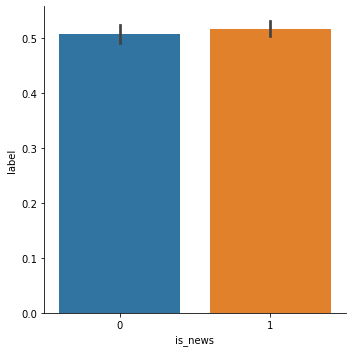

In [16]:
# Visually, effect of news item on green-ness is not significant
sns.catplot(x='is_news', y='label', data=green, kind='bar')

**3.B Test the hypothesis with a logistic regression using statsmodels.**

> **Hint:** The `sm.logit` function from `statsmodels.formula.api` will perform a logistic regression using a formula string.

In [17]:
import statsmodels.formula.api as sm

In [18]:
# Create variable of 'label' and 'is_news'
news_data = green[['label', 'is_news']]

In [19]:
# Create model and fit (use formula string)
news_model = sm.logit("label ~ is_news", data=news_data).fit()

Optimization terminated successfully.
         Current function value: 0.692751
         Iterations 3


**3.C Interpret the results of your model.**

In [20]:
# Summary
news_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  label   No. Observations:                 7395
Model:                          Logit   Df Residuals:                     7393
Method:                           MLE   Df Model:                            1
Date:                Fri, 01 Jul 2022   Pseudo R-squ.:               5.980e-05
Time:                        11:15:11   Log-Likelihood:                -5122.9
converged:                       True   LL-Null:                       -5123.2
Covariance Type:            nonrobust   LLR p-value:                    0.4337
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0303      0.038      0.806      0.420      -0.043       0.104
is_news        0.0374      0.048      0.783      0.434      -0.056       0.131
==============================================================================
"""

Based on this summary, we accept the null hypothesis that news and non-news site have equal probability of being evergreen.

'Log-Likelihood : LL-Null' ratio is practically the same, i.e. your model is as good as the model without any predictors, which means 'is_news' is useless as a predictor!

### 4. Does the website category affect green-ness?

**4.A Investigate with plots/EDA.**

In [21]:
# Largest count is unknown
green['alchemy_category'].value_counts()

?                     2342
recreation            1229
arts_entertainment     941
business               880
health                 506
sports                 380
culture_politics       343
computer_internet      296
science_technology     289
gaming                  76
religion                72
law_crime               31
unknown                  6
weather                  4
Name: alchemy_category, dtype: int64

In [22]:
green['alchemy_category'].replace(to_replace='?', value='unknown', inplace=True)

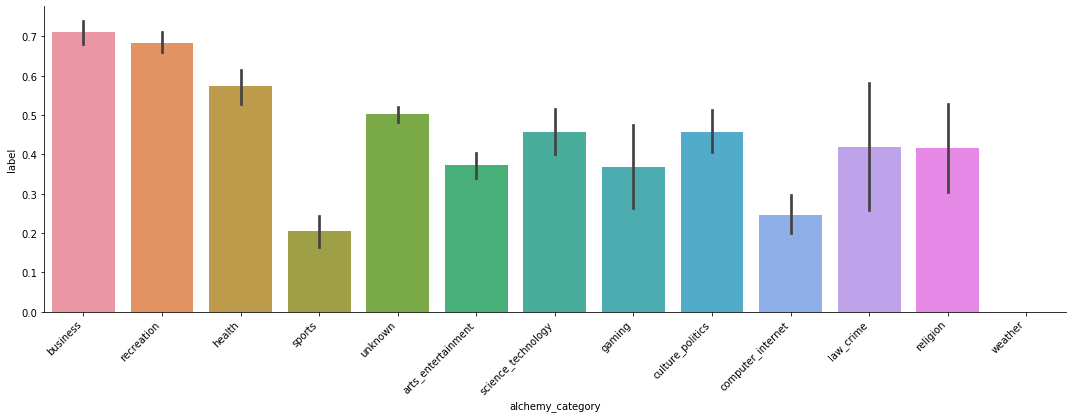

In [23]:
# Visually shows the number of observations in each category by obtaining the mean value for each one.
sns.catplot(x='alchemy_category', y='label', data=green, kind='bar', aspect=3).set_xticklabels(rotation=45, horizontalalignment='right')

In [24]:
# The black error lines at the top compute the confidence interval around the mean
# Business, Recreation and Health seem to dominate evergreen sites

**4.B Test the hypothesis with a logistic regression.**

In [25]:
cat_data = green[['label', 'alchemy_category']]

In [26]:
# Note! The reference category is set to be 'unknown'. This is wrapped into the intercept term. 
# Other categories must be interpreted as significantly different from unknown or not.
cat_model = sm.logit("label ~ C(alchemy_category, Treatment(reference='unknown'))", data=cat_data).fit()

         Current function value: 0.649499
         Iterations: 35


C:\Users\shmel\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


**4.C Interpret the model results.**

In [27]:
cat_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  label   No. Observations:                 7395
Model:                          Logit   Df Residuals:                     7382
Method:                           MLE   Df Model:                           12
Date:                Fri, 01 Jul 2022   Pseudo R-squ.:                 0.06249
Time:                        11:17:16   Log-Likelihood:                -4803.0
converged:                      False   LL-Null:                       -5123.2
Covariance Type:            nonrobust   LLR p-value:                2.585e-129
=============================================================================================================================================
                                                                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------------------------------
Intercept                                                                     0.0068      0.041      0.165      0.869      -0.074       0.088
C(alchemy_category, Treatment(reference='unknown'))[T.arts_entertainment]    -0.5307      0.079     -6.711      0.000      -0.686      -0.376
C(alchemy_category, Treatment(reference='unknown'))[T.business]               0.8952      0.085     10.522      0.000       0.728       1.062
C(alchemy_category, Treatment(reference='unknown'))[T.computer_internet]     -1.1235      0.141     -7.967      0.000      -1.400      -0.847
C(alchemy_category, Treatment(reference='unknown'))[T.culture_politics]      -0.1763      0.116     -1.520      0.128      -0.404       0.051
C(alchemy_category, Treatment(reference='unknown'))[T.gaming]                -0.5458      0.241     -2.261      0.024      -1.019      -0.073
C(alchemy_category, Treatment(reference='unknown'))[T.health]                 0.2878      0.099      2.910      0.004       0.094       0.482
C(alchemy_category, Treatment(reference='unknown'))[T.law_crime]             -0.3322      0.366     -0.907      0.364      -1.050       0.386
C(alchemy_category, Treatment(reference='unknown'))[T.recreation]             0.7668      0.074     10.367      0.000       0.622       0.912
C(alchemy_category, Treatment(reference='unknown'))[T.religion]              -0.3433      0.243     -1.415      0.157      -0.819       0.132
C(alchemy_category, Treatment(reference='unknown'))[T.science_technology]    -0.1803      0.125     -1.441      0.150      -0.425       0.065
C(alchemy_category, Treatment(reference='unknown'))[T.sports]                -1.3605      0.134    -10.188      0.000      -1.622      -1.099
C(alchemy_category, Treatment(reference='unknown'))[T.weather]              -18.1406   4331.829     -0.004      0.997   -8508.369    8472.087
=============================================================================================================================================
"""

In [28]:
# Many of the categories appear to have a significant effect on the likelihood of evergreen status. 
# Note! The reference category is set to be 'unknown'. This is wrapped into the intercept term. 
# Other categories must be interpreted as significantly different from unknown or not.

# Positive predictors of evergreen vs. unknown, based on coefficient values:
# 1. Business
# 2. Health
# 3. Recreation

# Negative predictors of evergreen vs. unknown, based on coefficient values:
# 1. Arts and entertainment
# 2. Computer and internet
# 3. Gaming
# 4. Sports

# The rest of the categories, like culture and politics or law and crime or religion or weather, based on p-value (P>|z|),
# are not significantly different from 'unknown' in their probability of being evergreen or not (should be lower than 0.05)

### 5. Does the image ratio affect green-ness?

**5.A Investigate with plots/EDA.**

In [29]:
# Initial difference in mean between green and non-green
green.groupby('label')['image_ratio'].mean()

label
0    0.309741
1    0.243443
Name: image_ratio, dtype: float64

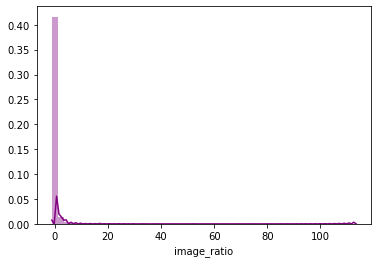

In [30]:
# Plotting distribution of image_ratio - not very useful as distribution is squashed together 
# Could use bins parameter to show better representation...
sns.distplot(green['image_ratio'], color='purple')

In [31]:
# qcut divides data up into percentiles - in this case into 5 equally-sized bins - to spread out distribution
green['image_ratio_qbinned'] = pd.qcut(green['image_ratio'], 5)

In [32]:
green['image_ratio_qbinned'].value_counts()

(0.124, 0.314]      1480
(0.0562, 0.124]     1479
(0.0189, 0.0562]    1479
(-1.001, 0.0189]    1479
(0.314, 113.333]    1478
Name: image_ratio_qbinned, dtype: int64

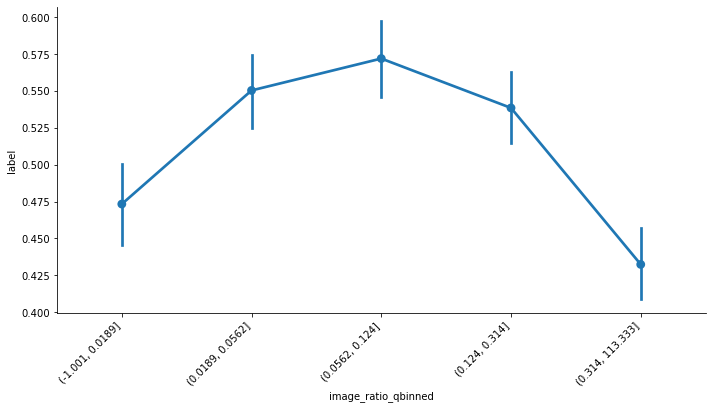

In [33]:
# Plot shows greater distribution of images towards green-ness within 0.0562-0.124 range
sns.catplot('image_ratio_qbinned', 'label', data=green, kind='point', aspect=2).set_xticklabels(rotation=45, horizontalalignment='right')

**5.B Test the hypothesis using a logistic regression.**

> **Note**: It is worth thinking about how to best represent this variable. It may not be wise to input the image ratio as-is.

In [34]:
# Convert image_ratio values to percentiles (what qcut is representing in bins) using stats.percentileofscore:
from scipy import stats

green['image_ratio_pctl'] = green.image_ratio.map(lambda x: stats.percentileofscore(green.image_ratio.values, x))

In [35]:
# i.e. each value is assigned percentile value
green['image_ratio_pctl']

0       11.210277
1       51.737661
2       59.371197
3       30.155510
4       37.288709
          ...    
7390    36.362407
7391    73.793103
7392    85.997295
7393     4.672076
7394    94.158215
Name: image_ratio_pctl, Length: 7395, dtype: float64

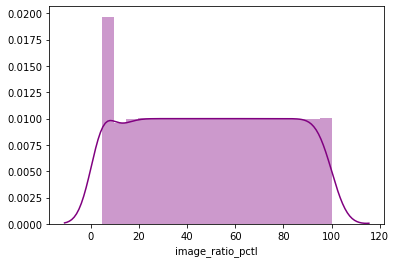

In [36]:
# Only 5-10% of websites have higher image ratio and rest fall in the median range - this may be more useful predictor
sns.distplot(green['image_ratio_pctl'], color='purple')

In [37]:
image_data = green[['label', 'image_ratio_pctl']]

In [38]:
image_model = sm.logit("label ~ image_ratio_pctl", data=image_data).fit()

Optimization terminated successfully.
         Current function value: 0.692458
         Iterations 3


**5.C Interpret the model.**

In [39]:
# Using log-likelihood and LL-Null, this is still ignoring non-linearity i.e. no significant effect on green-ness
image_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  label   No. Observations:                 7395
Model:                          Logit   Df Residuals:                     7393
Method:                           MLE   Df Model:                            1
Date:                Fri, 01 Jul 2022   Pseudo R-squ.:               0.0004832
Time:                        11:18:16   Log-Likelihood:                -5120.7
converged:                       True   LL-Null:                       -5123.2
Covariance Type:            nonrobust   LLR p-value:                   0.02607
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.1431      0.047      3.070      0.002       0.052       0.234
image_ratio_pctl    -0.0018      0.001     -2.224      0.026      -0.003      -0.000
====================================================================================
"""

In [40]:
# Another option is to fit model with percentile value PLUS the percentile squared (i.e. quadratic regression effect)
# This will let us model an inverse parabola 
# A quadratic regression is the process of finding the equation of the parabola that best fits a set of data.

In [41]:
image_model = sm.logit("label ~ image_ratio_pctl + np.power(image_ratio_pctl, 2)", data=green).fit()

Optimization terminated successfully.
         Current function value: 0.686094
         Iterations 4


In [42]:
image_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  label   No. Observations:                 7395
Model:                          Logit   Df Residuals:                     7392
Method:                           MLE   Df Model:                            2
Date:                Fri, 01 Jul 2022   Pseudo R-squ.:                0.009668
Time:                        11:18:21   Log-Likelihood:                -5073.7
converged:                       True   LL-Null:                       -5123.2
Covariance Type:            nonrobust   LLR p-value:                 3.084e-22
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                        -0.3687      0.071     -5.219      0.000      -0.507      -0.230
image_ratio_pctl                  0.0289      0.003      8.808      0.000       0.022       0.035
np.power(image_ratio_pctl, 2)    -0.0003   3.18e-05     -9.644      0.000      -0.000      -0.000
=================================================================================================
"""

In [43]:
# Now we see more significant effects on green-ness:
# 1. There is a positive effect of the image ratio percentile score (i.e. its rank across image_ratios), based on coefficient
# Also p-value improved

# 2. There is a negative quadratic effect of image ratio, based on coefficient
# This means, at a certain point, the squared term of image_ratio_pctl overtakes the linear term. 

# The highest probability of evergreen sites have image ratios in the median range (0.022-0.035)

### 6. Fit a logistic regression with multiple predictors.
- The choice of predictors is up to you. Test features you think may be valuable to predict evergreen status.
- Do any EDA you may need.
- Interpret the coefficients of the model.

> **Tip:** [This pdf is very useful for an overview of interpreting logistic regression coefficients.](https://www.unm.edu/~schrader/biostat/bio2/Spr06/lec11.pdf)

#### 'html_ratio' EDA

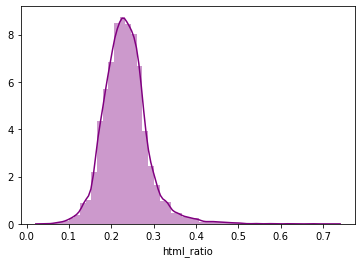

In [44]:
# 'html_ratio' distribution as-is, with normal distribution showing that data around the mean is more frequently-occurring
# Shows the greatest distribution between 0.15 and 0.25
sns.distplot(green['html_ratio'], color='purple')

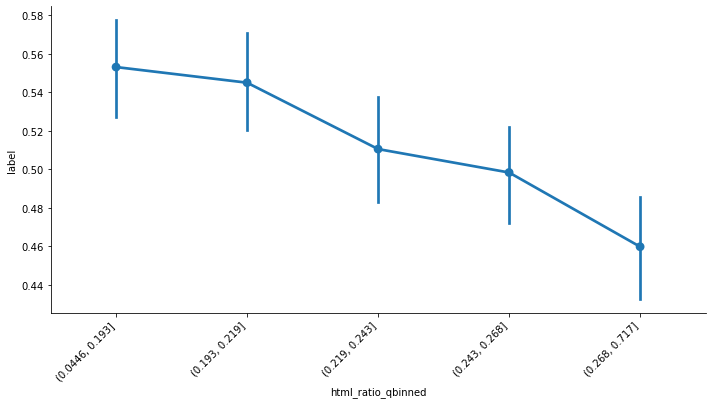

In [45]:
# Lets divide html_ratio equally among 5 bins - shows negative linear trend
green['html_ratio_qbinned'] = pd.qcut(green['html_ratio'], 5)
sns.catplot('html_ratio_qbinned', 'label', data=green, kind='point', aspect=2).set_xticklabels(rotation=45, horizontalalignment='right')

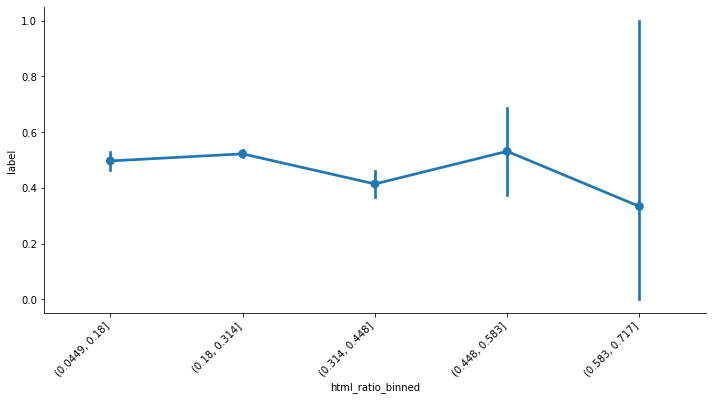

In [46]:
# Lets divide the range of data up into 5 bins - 
green['html_ratio_binned'] = pd.cut(green['html_ratio'], 5)
sns.catplot('html_ratio_binned', 'label', data=green, kind='point', aspect=2).set_xticklabels(rotation=45, horizontalalignment='right')

In [47]:
# Lets create column of percentile scores for html_ratio values
green['html_ratio_pctl'] = green.html_ratio.map(lambda x: stats.percentileofscore(green.html_ratio.values, x))

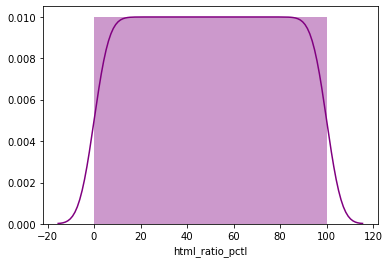

In [48]:
# Strong symmetric distribution so the majority of data points are close to mean percentile value
sns.distplot(green['html_ratio_pctl'], color='purple')

#### 'title' EDA

In [49]:
# Lets calculate the number of words in the title and plot distribution
def title_len(x):
    try:
        return len(x.split())
    except:
        return 0.

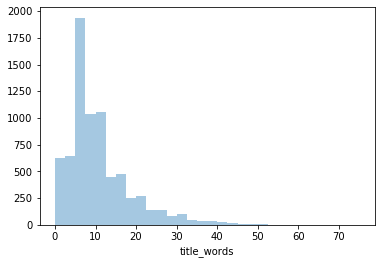

In [50]:
green['title_words'] = green.title.map(title_len)
sns.distplot(green.title_words, bins=30, kde=False)

In [51]:
# This shows that the average word length lies between 5-10 words, right-skewed showing mean is greater than median score
# Shorter, punchier titles would be easier to interpret

#### Logistic Regression model

I will use the following predictors to predict green-ness of website because they showed most signficant effects on green-ness:

- image_ratio_pctl PLUS quadratic effect,
- html_ratio_pctl,
- title_words


In [52]:
f = '''
label ~ image_ratio_pctl + np.power(image_ratio_pctl, 2) + html_ratio_pctl + title_words
'''

In [53]:
log_model = sm.logit(f, data=green).fit()

Optimization terminated successfully.
         Current function value: 0.667797
         Iterations 5


In [54]:
log_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  label   No. Observations:                 7395
Model:                          Logit   Df Residuals:                     7390
Method:                           MLE   Df Model:                            4
Date:                Fri, 01 Jul 2022   Pseudo R-squ.:                 0.03608
Time:                        11:19:01   Log-Likelihood:                -4938.4
converged:                       True   LL-Null:                       -5123.2
Covariance Type:            nonrobust   LLR p-value:                 9.885e-79
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                         0.3855      0.096      4.015      0.000       0.197       0.574
image_ratio_pctl                  0.0382      0.003     11.181      0.000       0.031       0.045
np.power(image_ratio_pctl, 2)    -0.0004   3.31e-05    -12.514      0.000      -0.000      -0.000
html_ratio_pctl                  -0.0078      0.001     -8.438      0.000      -0.010      -0.006
title_words                      -0.0446      0.003    -13.928      0.000      -0.051      -0.038
=================================================================================================
"""

In [55]:
# We've got all significant effects on our predictors here - see p-value under 0.05
# Lets exponentiate coefficients to odds ratios to better describe the relationship between predictor and target
np.exp(log_model.params)

Intercept                        1.470349
image_ratio_pctl                 1.038888
np.power(image_ratio_pctl, 2)    0.999585
html_ratio_pctl                  0.992222
title_words                      0.956410
dtype: float64

* For 1 percentile increase in 'image_ratio', there is approx 1.038x increase in the odds of evergreen (more likely to occur)
* For 1 unit increase in 'image_ratio_pctl ** 2', there is approx 0.999x decrease in the odds of evergreen (less likely to occur)
* For 1 percentile increase in 'html_ratio', there is approx 0.992x decrease in the odds of evergreen (less likely to occur)
* For 1 word increase in the length of the title, there is approx 0.956x decrease in the odds of evergreen (less likely to occur)